# Data Analysis for project Olist
GitHub location: https://github.com/LarsTinnefeld/olist_ecom_analysis.git

Structure of this notebook:
- Data import and preparation
- Exploratory data analysis

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import datetime
%matplotlib inline

In [4]:
sns.set_style("whitegrid")

# Data import, checks and preparation
High level view of the content. Not all available data tables will be needed for the project, only:
- Order
- Order Items
- Order review
- Prodcuts

In [6]:
df_orders = pd.read_csv("olist_orders_dataset.csv")
df_order_items = pd.read_csv("olist_order_items_dataset.csv")
df_order_review = pd.read_csv("olist_order_reviews_dataset.csv")
df_products = pd.read_csv("olist_products_dataset.csv")

------------------------------
## Order data

In [8]:
df_orders.describe().transpose()

,count,unique,top,freq
order_id,99441,99441,d32800fe9aa5928f98b923bfaa6e7a9b,1
customer_id,99441,99441,9eb0710fbd7867880ac311cdc0234dbc,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-06-01 13:39:44,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2016-10-27 17:32:07,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


In [10]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


The order data table contains order IDs with timestamps and customer. A few missing data in the date fields. Date will need to be formatted as datetime.

Important for our project are order purchase data and delivery date. We convert these two columns into datetime format:

In [16]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'], format='%Y-%m-%d').dt.date

In [18]:
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'], format='%Y-%m-%d').dt.date

Checking if there are repeating order-ids:

In [86]:
print('Total of unique orders: ', format(len(df_orders['order_id'].unique())))
print('Total of records: ', format(len(df_orders)))

Total of unique orders:  99441
Total of records:  99441


### Adding a new feature 'delivery_time', which contains the delivery duration from order to delivery. This might be a potential contributor to user satisfaction.

In [22]:
df_orders['delivery_time'] = df_orders['order_estimated_delivery_date'] - df_orders['order_purchase_timestamp']

checking delivery durations:

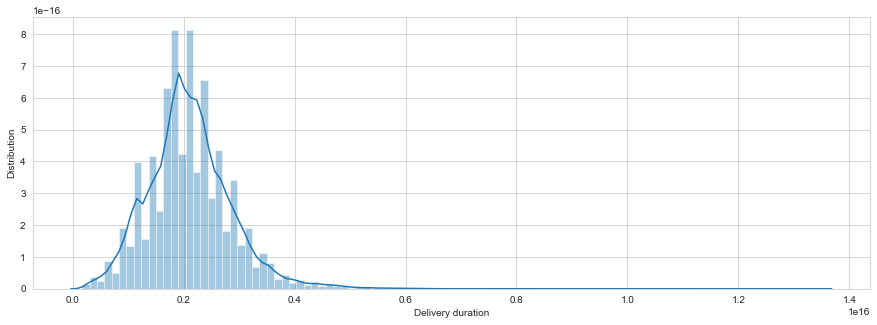

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(df_orders['delivery_time'], bins=100)
plt.ylabel('Distribution')
plt.xlabel('Delivery duration');

In [26]:
df_orders.describe()

,delivery_time
count,99441
mean,24 days 09:41:41.113222
std,8 days 19:54:34.774348
min,2 days 00:00:00
25%,19 days 00:00:00
50%,24 days 00:00:00
75%,29 days 00:00:00
max,156 days 00:00:00


The distribution is skewed to the right (long slim tail for long delievery durations).

----------
## Taking a look at the order item data

In [28]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [30]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [32]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [91]:
print('Total of unique orders: ', format(len(df_order_items['order_id'].unique())))
print('Total of records: ', format(len(df_order_items)))
print('Mean order lines per order: ', format(len(df_order_items)/len(df_order_items['order_id'].unique())))

Total of unique orders:  98666
Total of records:  112650
Mean order lines per order:  1.1417306873695092


First impression about typical order size: typical e-commerce

In [94]:
print('Number of duplcated records: ', format(df_order_items.duplicated().sum()))

Number of duplcated records:  0


## Need to generate table with quantity field
'order_item_id' is a running order line feature. For example: If an product is ordered with quantity 2, there are two rows which only differ from each other in the 'order_item_id' field. Instead, we need a single row with quantity 2 for such case.

Consolidate table:

In [148]:
df_order_items_consolidated = df_order_items.groupby(by=['product_id','order_id']).agg({'order_item_id':'count', 'seller_id':'first', 'shipping_limit_date': 'first', 'shipping_limit_date': 'first', 'price': 'first', 'freight_value': 'first'}).reset_index()

In [151]:
print('Checking is no info was lost')
print('Orders in new table: ', format(len(df_order_items_consolidated['order_id'].unique())))
print('Orders in old table: ', format(len(df_order_items['order_id'].unique())))
print('SKUs in new table: ', format(len(df_order_items_consolidated['product_id'].unique())))
print('SKUs in old table: ', format(len(df_order_items['product_id'].unique())))
print('Total quantity in new table: ', format(df_order_items_consolidated['order_item_id'].sum()))
print('Total quantity in old table: ', format(len(df_order_items)))

Checking is no info was lost
Orders in new table:  98666
Orders in old table:  98666
SKUs in new table:  32951
SKUs in old table:  32951
Total quantity in new table:  112650
Total quantity in old table:  112650


### New order item table: 'df_order_items_consolidated'
The table contains the orders in detail with SKUs, seller and prices. No missing data. The order ID count is higher than in the order data which is would appear logic as oders will sometimes contain more than one order line. But in reality, there are more than 700 order IDs missing as the count of unique values shows.

---
## Taking a look at the order review data

In [40]:
df_order_review.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [42]:
df_order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [44]:
df_order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [155]:
print('Count of unique review-ids: ', format(len(df_order_review['review_id'].unique())))
print('Count of total reviews: ', format(len(df_order_review['review_id'])))
print('Count of unique order-ids: ', format(len(df_order_review['order_id'].unique())))

Count of unique review-ids:  99173
Count of total reviews:  100000
Count of unique order-ids:  99441


There 827 are more revies than review ids (0.8%). 99.7% of all orders have revies. => This is a very good representation.

---
## Taking a look at the products

In [50]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [52]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [54]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [56]:
len(df_products['product_id'].unique())

32951

In [58]:
len(df_products)

32951

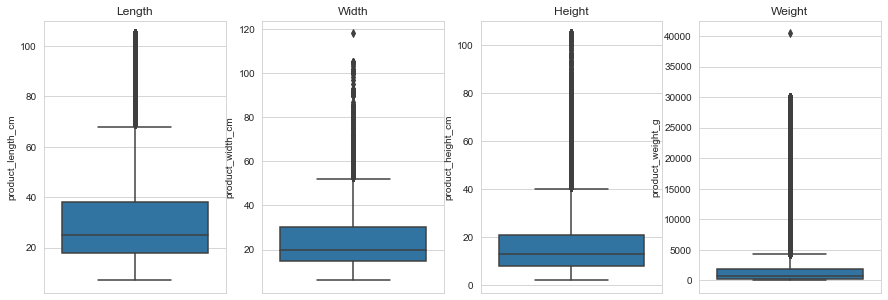

In [60]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,5))
ax1.set_title('Length')
ax2.set_title('Width')
ax3.set_title('Height')
ax4.set_title('Weight')

sns.boxplot(data=df_products, orient='v', x='product_length_cm', ax=ax1)
sns.boxplot(data=df_products, orient='v', x='product_width_cm', ax=ax2)
sns.boxplot(data=df_products, orient='v', x='product_height_cm', ax=ax3)
sns.boxplot(data=df_products, orient='v', x='product_weight_g', ax=ax4);

The lookup table contains the products, their description and physical properties. There are no duplicated records and the data formats are ok.

---
---
# Exploratory data analysis

## Order data
### Points of interest:
- Trend and pattern in order volumne over time
- Correlation order volume to delivery duration?
- Order profile (units per order)
- Order profile (units per order line)
- Order lines per order

To create a order-volume-timeline we will merge the order and the order-items data tables and group by days.
### Create combined order data table:

In [173]:
df_orders_merged = df_orders.merge(df_order_items_consolidated, on='order_id')

In [174]:
df_orders_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 102424
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       102425 non-null  object         
 1   customer_id                    102425 non-null  object         
 2   order_status                   102425 non-null  object         
 3   order_purchase_timestamp       102425 non-null  object         
 4   order_approved_at              102411 non-null  object         
 5   order_delivered_carrier_date   101397 non-null  object         
 6   order_delivered_customer_date  100195 non-null  object         
 7   order_estimated_delivery_date  102425 non-null  object         
 8   delivery_time                  102425 non-null  timedelta64[ns]
 9   product_id                     102425 non-null  object         
 10  order_item_id                  102425 non-null  int64   

In [175]:
df_orders_merged.describe()

,delivery_time,order_item_id,price,freight_value
count,102425,102425.000000,102425.000000,102425.000000
mean,24 days 10:51:03.681718,1.099829,124.422006,20.111152
std,8 days 20:21:53.778888,0.456926,188.926084,15.884700
min,3 days 00:00:00,1.000000,0.850000,0.000000
25%,19 days 00:00:00,1.000000,40.000000,13.140000
50%,24 days 00:00:00,1.000000,78.800000,16.320000
75%,29 days 00:00:00,1.000000,139.000000,21.220000
max,156 days 00:00:00,20.000000,6735.000000,409.680000


In [176]:
df_orders_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,product_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,20 days,595fac2a385ac33a80bd5114aec74eb8,1,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27 days,aa4383b373c6aca5d8797843e5594415,1,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,27 days,d0b61bfb1de832b15ba9d266ca96e5b0,1,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,13 days,65266b2da20d04dbe00c5c2d3bb7859e,1,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [178]:
len(df_order_items)/len(df_orders_merged['product_id'].unique())

3.4187126339109586

### Renaming columns, dropping not required columns:

In [181]:
df_orders_merged.rename(columns={'order_purchase_timestamp':'order_date', 'order_estimated_delivery_date': 'delivery_date', 'product_id': 'SKU_id', 'order_item_id': 'qty'}, inplace=True)

In [184]:
df_orders_merged.drop(['order_delivered_carrier_date', 'order_delivered_customer_date', 'order_approved_at', 'shipping_limit_date'], axis=1, inplace=True)

In [187]:
df_orders_merged.head()

,order_id,customer_id,order_status,order_date,delivery_date,delivery_time,SKU_id,qty,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18,16 days,87285b34884572647811a353c7ac498a,1,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13,20 days,595fac2a385ac33a80bd5114aec74eb8,1,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04,27 days,aa4383b373c6aca5d8797843e5594415,1,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-15,27 days,d0b61bfb1de832b15ba9d266ca96e5b0,1,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-26,13 days,65266b2da20d04dbe00c5c2d3bb7859e,1,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


There are in average 3.4 order lines per order. The merged table has the same amount of rows as the original order_item table. This confirms that the merge worked.

### Checking order price distribution:

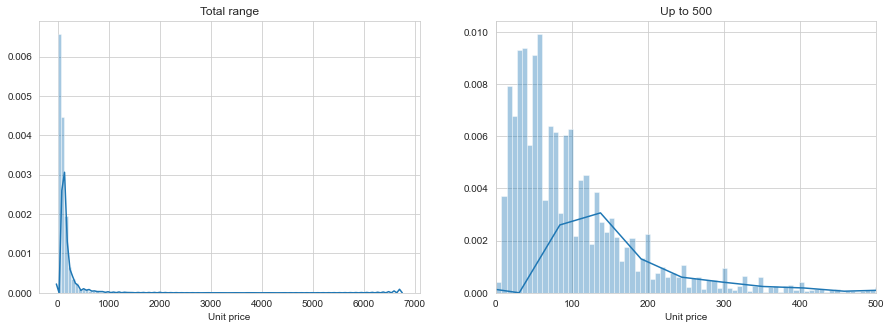

In [188]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.set_title('Total range')
ax2.set_title('Up to 500')

ax2.set_xlim([0, 500])

sns.distplot(df_orders_merged['price'], bins=100, ax=ax1, axlabel='Unit price',)
sns.distplot(df_orders_merged['price'], bins=1000, ax=ax2, axlabel='Unit price');

No currency was provided with the data set, but I assume this Brazilian Real. The statistical mean for the item price is 120, but this based on a skewed distribution. The majority of the prices is in the lower range of up to 100.

<AxesSubplot:xlabel='order_status', ylabel='count'>

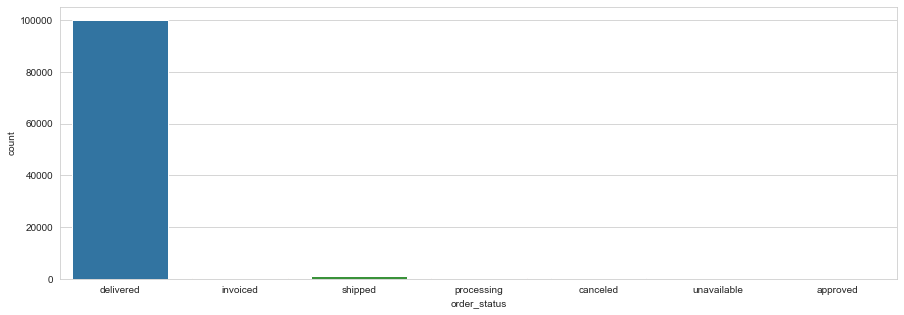

In [211]:
plt.figure(figsize=(15,5))
sns.countplot(df_orders_merged['order_status'])

In [224]:
df_orders_merged['order_status'].value_counts()/len(df_orders_merged)*100

delivered      97.823773
shipped         1.100317
canceled        0.453991
invoiced        0.314376
processing      0.298755
unavailable     0.006834
approved        0.001953
Name: order_status, dtype: float64

98% of all orders were delivered.

### Creating table with grouped order dates:

In [189]:
df_orders_daily = df_orders_merged.groupby('order_date').agg({'qty':'sum', 'order_id':'count', 'price':'sum'})

In [196]:
df_orders_daily.head()

,qty,order_id,price
order_date,,,
2016-09-04,2,2,72.89
2016-09-05,1,1,59.50
2016-09-15,3,1,44.99
2016-10-02,1,1,100.00
2016-10-03,8,8,463.48
